# Loading Relevant Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk

# Download necessary NLTK datasets
nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'vader_lexicon'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Load Dataset and Pre-processing

In [ ]:


import pandas as pd
# read the cv file
data = pd.read_csv("netflix_titles.csv")


In [ ]:
# checking for null values and filling the null values with mode
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


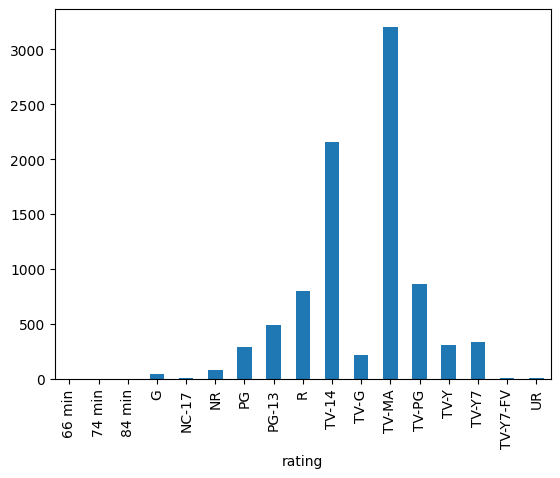

In [ ]:
# Group by 'rating' and plot the size of each group as a bar chart
data.groupby(['rating']).size().plot(kind='bar')

# Show the plot
plt.show()

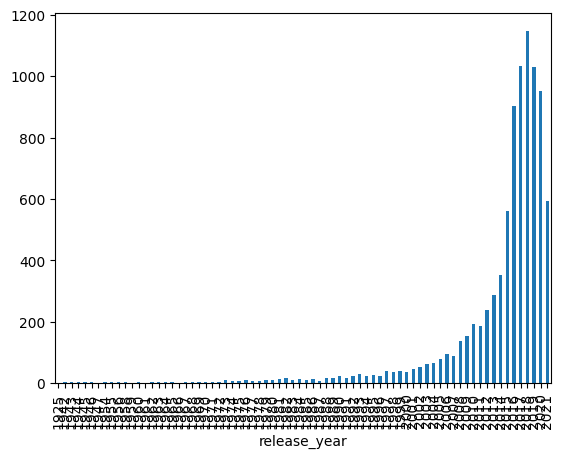

In [ ]:
# Group by 'release year' and plot the size of each group as a bar chart
data.groupby(['release_year']).size().plot(kind='bar')

# Show the plot
plt.show()

In [ ]:
data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

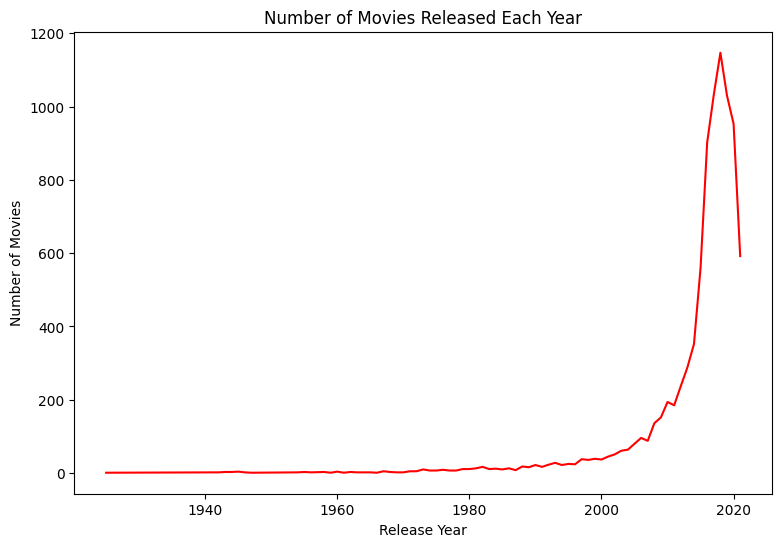

In [ ]:
# Group by 'release_year' and count the number of occurrences
table = data.groupby('release_year').size()

# Plot the data
f, ax = plt.subplots(1, 1, figsize=(9, 6))
table.plot(ax=ax, c='red')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

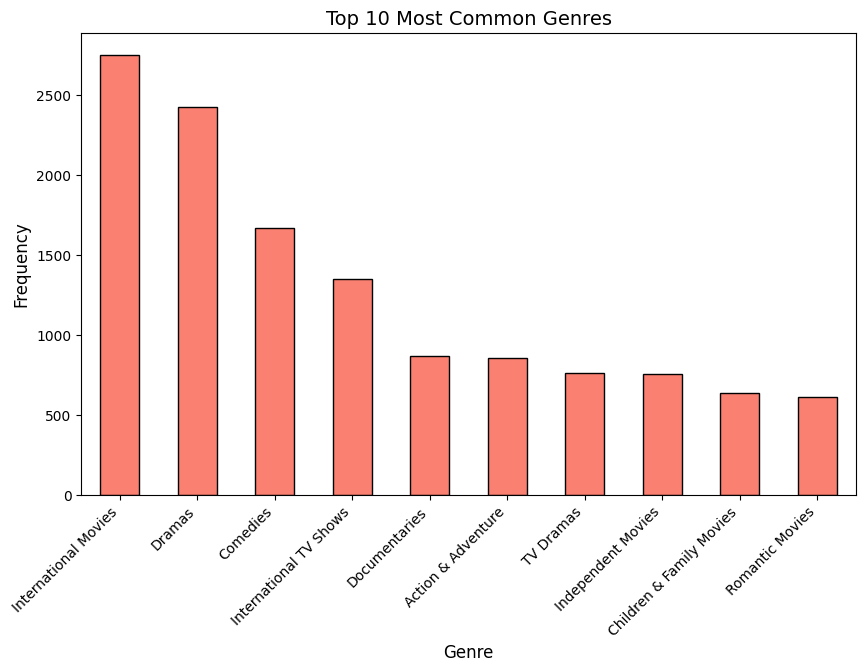

In [ ]:
# Preprocess the genres
genres = data['listed_in'].dropna().str.split(', ').explode()

# Count the frequency of each genre
genre_counts = genres.value_counts()

# Plot the most common genres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Most Common Genres', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#dropping irellrvant column
columns_to_drop = ['date_added','show_id','listed_in','cast', 'director']

# Drop the columns
data = data.drop(columns=columns_to_drop)

In [ ]:
print (data.shape)

(8807, 7)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   country       7976 non-null   object
 3   release_year  8807 non-null   int64 
 4   rating        8803 non-null   object
 5   duration      8804 non-null   object
 6   description   8807 non-null   object
dtypes: int64(1), object(6)
memory usage: 481.8+ KB


In [ ]:
# checking for null values and filling the null values with mode
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 country     831
rating        4
duration      3
dtype: int64


In [ ]:
# Filling the null values with 'null' (as a string)
data = data.fillna('null')

# Verifying that there are no more missing values
print("Number of NaN values in each column after filling:")
print(data.isnull().sum())

Number of NaN values in each column after filling:
type            0
title           0
country         0
release_year    0
rating          0
duration        0
description     0
dtype: int64


In [ ]:
data.head()

type                  title        country  release_year rating  \
0    Movie   Dick Johnson Is Dead  United States          2020  PG-13   
1  TV Show          Blood & Water   South Africa          2021  TV-MA   
2  TV Show              Ganglands           null          2021  TV-MA   
3  TV Show  Jailbirds New Orleans           null          2021  TV-MA   
4  TV Show           Kota Factory          India          2021  TV-MA   

    duration                                        description  
0     90 min  As her father nears the end of his life, filmm...  
1  2 Seasons  After crossing paths at a party, a Cape Town t...  
2   1 Season  To protect his family from a powerful drug lor...  
3   1 Season  Feuds, flirtations and toilet talk go down amo...  
4  2 Seasons  In a city of coaching centers known to train I...

# Text Classification

In [ ]:

#Selecting  the needed columns
data = data[['description', 'type']]

data.columns = ["description", "Target_Label"]
data.head()


description Target_Label
0  As her father nears the end of his life, filmm...        Movie
1  After crossing paths at a party, a Cape Town t...      TV Show
2  To protect his family from a powerful drug lor...      TV Show
3  Feuds, flirtations and toilet talk go down amo...      TV Show
4  In a city of coaching centers known to train I...      TV Show

In [ ]:
#Checking for Class Imballance
print("\n All Data Labels")
print(data. groupby ("Target_Label"). count() )


 All Data Labels
              description
Target_Label             
Movie                6131
TV Show              2676


In [ ]:
#generating our term frequenct matrix and Features Creation
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Apply CountVectorizer to the text column and transform it into a sparse matrix
X = vectorizer.fit_transform(data['description'])

# Convert the sparse matrix to a DataFrame
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the transformed data
X.head()


000  007  009  10  100  1000  102  108  10th  11  ...  zé  álex  álvaro  \
0    0    0    0   0    0     0    0    0     0   0  ...   0     0       0   
1    0    0    0   0    0     0    0    0     0   0  ...   0     0       0   
2    0    0    0   0    0     0    0    0     0   0  ...   0     0       0   
3    0    0    0   0    0     0    0    0     0   0  ...   0     0       0   
4    0    0    0   0    0     0    0    0     0   0  ...   0     0       0   

   ángel  émile  ömer  über  łukasz  ōarai  şeref  
0      0      0     0     0       0      0      0  
1      0      0     0     0       0      0      0  
2      0      0     0     0       0      0      0  
3      0      0     0     0       0      0      0  
4      0      0     0     0       0      0      0  

[5 rows x 19159 columns]

<Axes: xlabel='Target_Label', ylabel='count'>

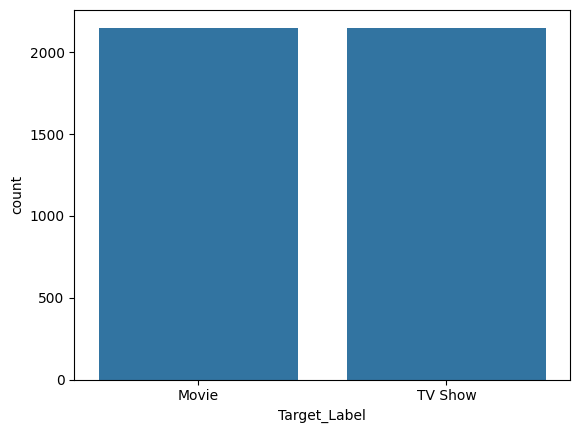

In [ ]:
#spliting the dataset into train and test and correctung class imballance
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Extract target variable
y = data['Target_Label']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=99
)

# Initialize the RandomUnderSampler to handle class imbalance
resampler = RandomUnderSampler(random_state=0)

# Perform undersampling on the training data
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)

# Plot the class distribution in the undersampled training set
sns.countplot(x=y_train_undersampled)


In [ ]:
#we have our data ready for training we proceed with intantiating the model [(Multinomial Naïve Bayes)classifier]

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model. fit(X_train_undersampled, y_train_undersampled)

MultinomialNB()

In [ ]:
#now we have trained our model, we will proceed to evaluate it
# Make predictions with the trained model
y_pred = model.predict(X_test)

# Compute accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f\n\n' % (acc))

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, '\n\n')
print('-------------------------------------------')

# Generate the classification report
result = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n", result)


Accuracy: 0.70


Confusion Matrix:
[[898 339]
 [182 343]] 


-------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

       Movie       0.83      0.73      0.78      1237
     TV Show       0.50      0.65      0.57       525

    accuracy                           0.70      1762
   macro avg       0.67      0.69      0.67      1762
weighted avg       0.73      0.70      0.71      1762



# PART 2 SENTIMENT ANALYSIS

In [ ]:
import pandas as pd
# Now lets read in our review data - we're going to use this for our analysis
App_reviews = pd.read_csv('netflix_reviews.csv')
App_reviews.head()

reviewId             userName  \
0  063217bf-c53b-4fbd-9c8a-17832fcd18c8     Melvin Rollinson   
1  b83da0c8-28df-4331-b810-6e527517fcd5  M Shahid Ali Baloch   
2  dd451a58-61d4-40e2-806b-20118cf6a84a        Sidrah Shaikh   
3  34f0773b-5109-4447-a07d-1d0e0dfdcd35                Anung   
4  8c6cf855-7a5b-4aeb-8428-b31af4134b8f      Ankan Raj Maity   

                                             content  score  thumbsUpCount  \
0                                          Very good      5              0   
1                                 MShahid Ali baloch      5              0   
2  Very limited series...all the famous series ar...      2              0   
3  Cant stream HD with Asus Zenfone 10 with snapd...      1              0   
4                                Worst ui experience      1              0   

     reviewCreatedVersion                   at              appVersion  
0   8.95.0 build 13 50554  2024-11-21 12:55:35   8.95.0 build 13 50554  
1  8.139.3 build 31 51120  2024-11-21 12:23:10  8.139.3 build 31 51120  
2  8.139.3 build 31 51120  2024-11-21 12:10:28  8.139.3 build 31 51120  
3  8.139.3 build 31 51120  2024-11-21 12:01:20  8.139.3 build 31 51120  
4                     NaN  2024-11-21 11:54:05                     NaN

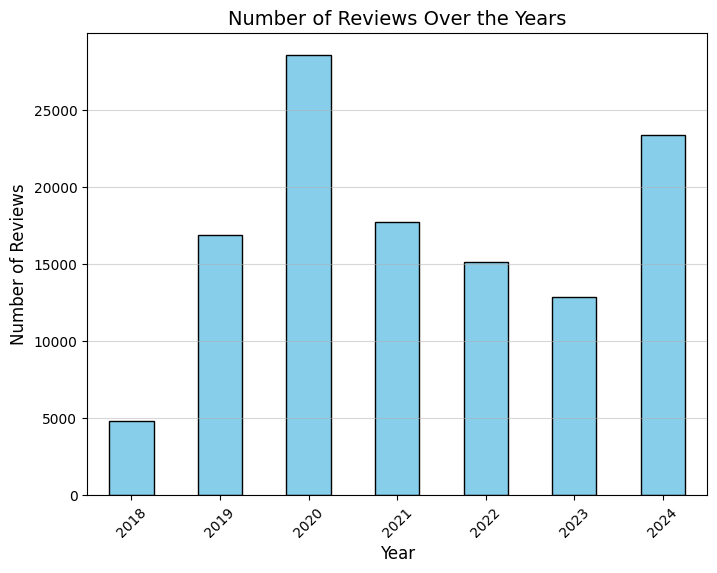

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract year from the 'at' column
App_reviews['year'] = pd.to_datetime(App_reviews['at']).dt.year

# Count reviews per year
reviews_per_year = App_reviews.groupby('year')['content'].count()

# Plot reviews against years
plt.figure(figsize=(8, 6))
reviews_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Reviews Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

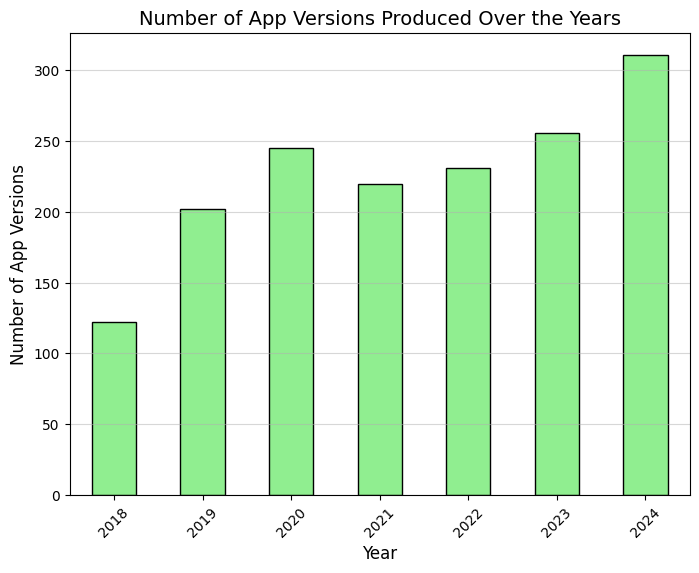

In [ ]:
# Extract year from the 'at' column
App_reviews['year'] = pd.to_datetime(App_reviews['at']).dt.year

# Count unique app versions per year
app_versions_per_year = App_reviews.groupby('year')['appVersion'].nunique()

# Plot the number of app versions produced over the years
plt.figure(figsize=(8, 6))
app_versions_per_year.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of App Versions Produced Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of App Versions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

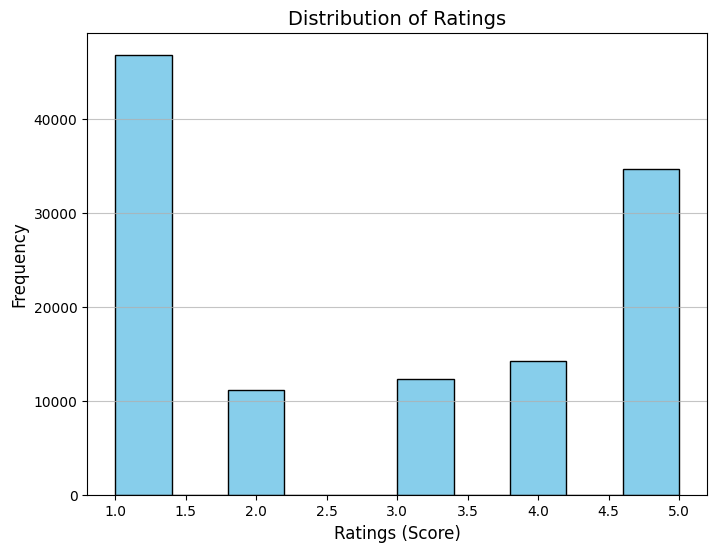

In [ ]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(App_reviews['score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings', fontsize=14)
plt.xlabel('Ratings (Score)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
# checking for null values and filling the null values with mode
missing_values = App_reviews.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 userName                    2
content                     3
reviewCreatedVersion    18122
appVersion              18122
dtype: int64


In [ ]:
# Filling the missing values with 'null' for each column
App_reviews = App_reviews.fillna('null')

# Verifying that there are no more missing values
print("Number of NaN values in each column after filling:")
print(App_reviews.isnull().sum())

Number of NaN values in each column after filling:
reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
year                    0
dtype: int64


In [ ]:
App_reviews.shape

(119320, 9)

In [ ]:
App_reviews.head()

reviewId             userName  \
0  063217bf-c53b-4fbd-9c8a-17832fcd18c8     Melvin Rollinson   
1  b83da0c8-28df-4331-b810-6e527517fcd5  M Shahid Ali Baloch   
2  dd451a58-61d4-40e2-806b-20118cf6a84a        Sidrah Shaikh   
3  34f0773b-5109-4447-a07d-1d0e0dfdcd35                Anung   
4  8c6cf855-7a5b-4aeb-8428-b31af4134b8f      Ankan Raj Maity   

                                             content  score  thumbsUpCount  \
0                                          Very good      5              0   
1                                 MShahid Ali baloch      5              0   
2  Very limited series...all the famous series ar...      2              0   
3  Cant stream HD with Asus Zenfone 10 with snapd...      1              0   
4                                Worst ui experience      1              0   

     reviewCreatedVersion                   at              appVersion  year  
0   8.95.0 build 13 50554  2024-11-21 12:55:35   8.95.0 build 13 50554  2024  
1  8.139.3 build 31 51120  2024-11-21 12:23:10  8.139.3 build 31 51120  2024  
2  8.139.3 build 31 51120  2024-11-21 12:10:28  8.139.3 build 31 51120  2024  
3  8.139.3 build 31 51120  2024-11-21 12:01:20  8.139.3 build 31 51120  2024  
4                    null  2024-11-21 11:54:05                    null  2024

In [ ]:
App_reviews.describe()

score  thumbsUpCount           year
count  119320.000000  119320.000000  119320.000000
mean        2.821396       9.995449    2021.286314
std         1.707489      98.955184       1.845202
min         1.000000       0.000000    2018.000000
25%         1.000000       0.000000    2020.000000
50%         3.000000       0.000000    2021.000000
75%         5.000000       1.000000    2023.000000
max         5.000000    8032.000000    2024.000000

In [ ]:
# we will instantite the sentiment Analyzer we will proceed to generate polarity score.
# We can extract the values from the dictionary and create new columns within our dataframe
App_reviews['content'] = App_reviews['content'].astype(str)

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Convert all values in the 'content' column to strings
App_reviews['content'] = App_reviews['content'].astype(str)

# Create new columns for sentiment scores
App_reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in App_reviews['content']]
App_reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in App_reviews['content']]
App_reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in App_reviews['content']]
App_reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in App_reviews['content']]

# Display the updated DataFrame with sentiment columns
print(App_reviews[['content', 'compound', 'neg', 'neu', 'pos']].head())


                                             content  compound    neg    neu  \
0                                          Very good    0.4927  0.000  0.238   
1                                 MShahid Ali baloch    0.0000  0.000  1.000   
2  Very limited series...all the famous series ar...   -0.0240  0.096  0.810   
3  Cant stream HD with Asus Zenfone 10 with snapd...   -0.3612  0.143  0.857   
4                                Worst ui experience   -0.6249  0.672  0.328   

     pos  
0  0.762  
1  0.000  
2  0.094  
3  0.000  
4  0.000  


In [ ]:
#to confirm this has work we use the head function
App_reviews.head()

reviewId             userName  \
0  063217bf-c53b-4fbd-9c8a-17832fcd18c8     Melvin Rollinson   
1  b83da0c8-28df-4331-b810-6e527517fcd5  M Shahid Ali Baloch   
2  dd451a58-61d4-40e2-806b-20118cf6a84a        Sidrah Shaikh   
3  34f0773b-5109-4447-a07d-1d0e0dfdcd35                Anung   
4  8c6cf855-7a5b-4aeb-8428-b31af4134b8f      Ankan Raj Maity   

                                             content  score  thumbsUpCount  \
0                                          Very good      5              0   
1                                 MShahid Ali baloch      5              0   
2  Very limited series...all the famous series ar...      2              0   
3  Cant stream HD with Asus Zenfone 10 with snapd...      1              0   
4                                Worst ui experience      1              0   

     reviewCreatedVersion                   at              appVersion  year  \
0   8.95.0 build 13 50554  2024-11-21 12:55:35   8.95.0 build 13 50554  2024   
1  8.139.3 build 31 51120  2024-11-21 12:23:10  8.139.3 build 31 51120  2024   
2  8.139.3 build 31 51120  2024-11-21 12:10:28  8.139.3 build 31 51120  2024   
3  8.139.3 build 31 51120  2024-11-21 12:01:20  8.139.3 build 31 51120  2024   
4                    null  2024-11-21 11:54:05                    null  2024   

   compound    neg    neu    pos  
0    0.4927  0.000  0.238  0.762  
1    0.0000  0.000  1.000  0.000  
2   -0.0240  0.096  0.810  0.094  
3   -0.3612  0.143  0.857  0.000  
4   -0.6249  0.672  0.328  0.000

In [ ]:
#more insight
App_reviews [['compound', 'neg', 'neu', 'pos']]. describe()

compound            neg            neu            pos
count  119320.000000  119320.000000  119320.000000  119320.000000
mean        0.191506       0.079870       0.748875       0.170735
std         0.543363       0.105776       0.178042       0.183303
min        -0.998300       0.000000       0.000000       0.000000
25%        -0.250000       0.000000       0.662000       0.000000
50%         0.250000       0.045000       0.769000       0.127000
75%         0.680800       0.132000       0.864000       0.254000
max         0.999200       1.000000       1.000000       1.000000

<Axes: xlabel='compound', ylabel='Count'>

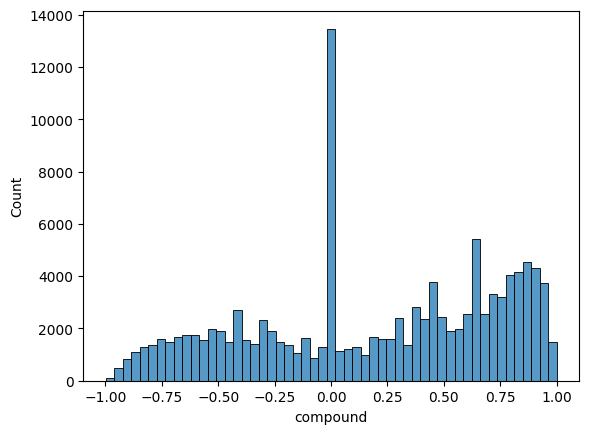

In [ ]:
sns.histplot(App_reviews['compound'])

<Axes: xlabel='pos', ylabel='Count'>

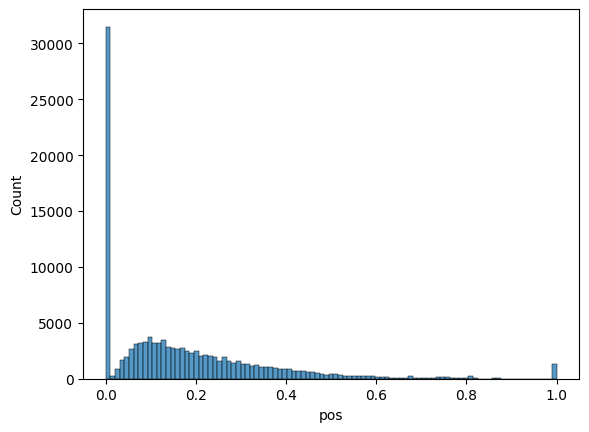

In [ ]:
# the average overall score of 0.19 shows that users generally have a slightly positive perception of the Netflix app
sns.histplot(App_reviews['pos'])

<Axes: xlabel='neg', ylabel='Count'>

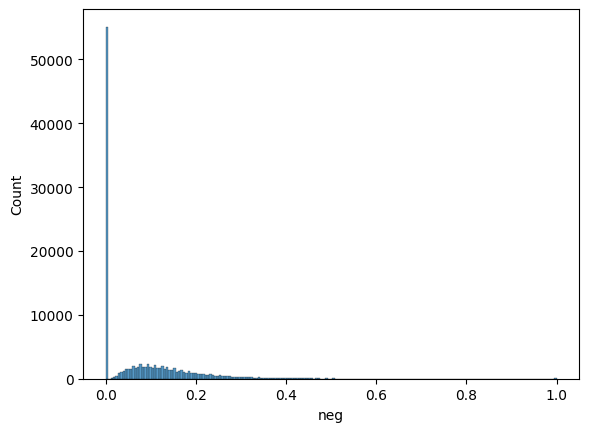

In [ ]:
#We can also take a look at the distribution of positive and negative scores too.

sns.histplot(App_reviews['neg'])

In [ ]:
print(App_reviews['score'].unique())

[5 2 1 4 3]


In [ ]:
# Lets look at how many negative reviews we have and the app version

# Create a new column indicating if the review is negative (compound score <= 0)
# Create a new column indicating if the review is negative (compound score <= 0)
App_reviews['is_negative'] = App_reviews['compound'] <= 0

# Group by app version and sum the 'is_negative' values to count the negative reviews for a given version
negative_reviews_for_each_version = App_reviews.groupby('appVersion')['is_negative'].sum()

# Display the result
print(negative_reviews_for_each_version)

appVersion
1.0                        30
1.6.0 build 443             1
1.8.0 build 561             1
1.8.1 build 573             0
2.2.0 build 843             0
                         ... 
8.97.1 build 11 50573       4
8.97.3 build 19 50576     212
8.99.0 build 3 50586        0
8.99.1 build 8 50590      192
null                     7695
Name: is_negative, Length: 591, dtype: int64


In [ ]:
# to get more insight we should look at the number of negative reviews as a proportion of the total number of app versions

# Calculate as percentage of total reviews
# Calculate the percentage of negative reviews for each product
# Calculate the percentage of negative reviews for each app version
percent_negative = pd.DataFrame(
    (App_reviews['compound'] <= 0).groupby(App_reviews['appVersion']).sum() /
    App_reviews['appVersion'].groupby(App_reviews['appVersion']).count() * 100,
    columns=['%negative reviews']
).sort_values(by='%negative reviews')

print(percent_negative)

                       %negative reviews
appVersion                              
6.12.0 build 29720                   0.0
6.11.0 build 29550                   0.0
6.12.0 build 29726                   0.0
4.10.6 build 11178                   0.0
6.13.0 build 29939                   0.0
...                                  ...
6.18.0 build 18 31540              100.0
6.20.0 build 27 31570              100.0
8.12.0 build 3 40114               100.0
8.120.0 build 9 50710              100.0
6.25.0 build 5 31659               100.0

[591 rows x 1 columns]


In [ ]:
#checking for appversion with most reviews

import re

#some preprocess_text function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

# Preprocess the reviews
App_reviews['processed_review'] = App_reviews['content'].apply(preprocess_text)

# Count positive and negative reviews for each app version and sort in descending order
review_counts = App_reviews.groupby('appVersion', group_keys=False).apply(
    lambda x: pd.Series({
        'positive_reviews': (x['compound'] > 0).sum(),
        'negative_reviews': (x['compound'] <= 0).sum()
    }), include_groups=False
).reset_index()

# Calculate total reviews and sort in descending order
review_counts['total_reviews'] = review_counts['positive_reviews'] + review_counts['negative_reviews']
review_counts_sorted = review_counts.sort_values(by='total_reviews', ascending=False)

# Display the counts
print(review_counts_sorted)

                appVersion  positive_reviews  negative_reviews  total_reviews
590                   null             10427              7695          18122
360  7.84.1 build 28 35243              1236               675           1911
584  8.96.1 build 16 50568               916               964           1880
273  7.38.0 build 27 34635              1171               532           1703
396  8.104.0 build 5 50619               543               706           1249
..                     ...               ...               ...            ...
149     6.12.0 build 29720                 1                 0              1
147     6.11.0 build 29550                 1                 0              1
354  7.82.0 build 32 35202                 1                 0              1
143      6.1.0 build 27334                 0                 1              1
427   8.12.0 build 3 40114                 0                 1              1

[591 rows x 4 columns]


In [ ]:
#checking for most frequent words
#we have selected 7.84.1 build 28 35243 because its has the most review aside the NULL
# Apply the preprocess_text function to the 'reviews.text' column
App_reviews['processed_review'] = App_reviews['content'].apply(preprocess_text)


# Filter for positive reviews (compound > 0) for the specific product
reviews_positive_subset = App_reviews.loc[(App_reviews['appVersion'] == '7.84.1 build 28 35243') & (App_reviews['compound'] > 0),]

# Filter for negative reviews (compound <= 0) for the specific product
reviews_negative_subset = App_reviews.loc[(App_reviews['appVersion'] == '7.84.1 build 28 35243') & (App_reviews['compound'] <= 0), :]

# Display the first few rows of the positive reviews subset
print(reviews_positive_subset.head())

                                   reviewId          userName  \
3288   f06c239b-cb78-4358-818e-624139b96d88       Mike Parvin   
3792   baa9e4a4-6e85-4dfb-89ec-af58d2020db0   PIKACHU WEASLEY   
5761   5918ff10-3f5f-4c58-a0d8-de033664f2ce             EA LZ   
15821  0353aab6-7b3d-4f4e-9922-572a54053e7c  Michelle Hogarth   
15825  cf3886d0-970a-4208-bfba-1ae48e5894c2        Henry Butz   

                                                 content  score  \
3288                                               Great      5   
3792   I have installed the app but have been unable ...      1   
5761                          Love it once a year or two      5   
15821  I love this app, but I think that 'My List' ca...      4   
15825  This stinky software update is spreading to ot...      1   

       thumbsUpCount   reviewCreatedVersion                   at  \
3288               0  7.84.1 build 28 35243  2024-10-10 09:14:32   
3792               0  7.84.1 build 28 35243  2024-08-22 04:34:52   
57

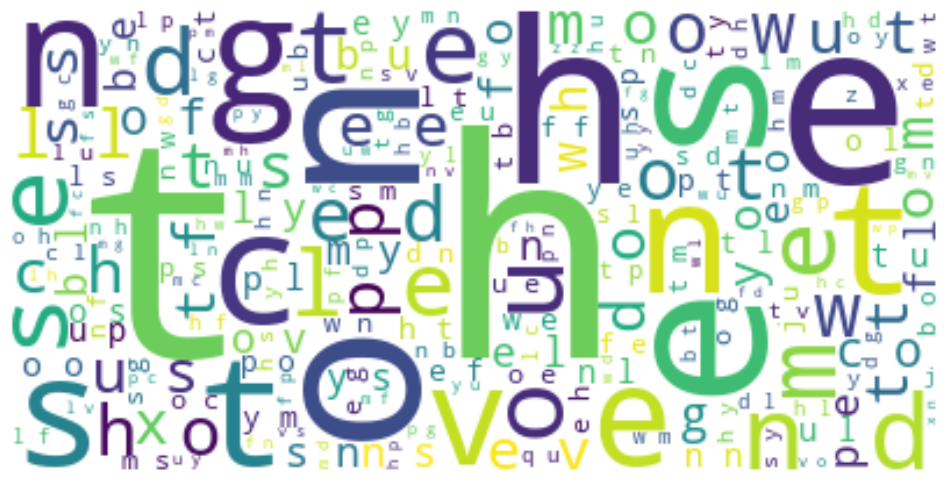

In [ ]:
#using the wordcloud library
# Wordcloud of words from negative reviews by appversion
neg_tokens = [word for review in reviews_negative_subset ['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

# Display the generated image:
plt.figure(figsize=(12,12))
plt. imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt. show()

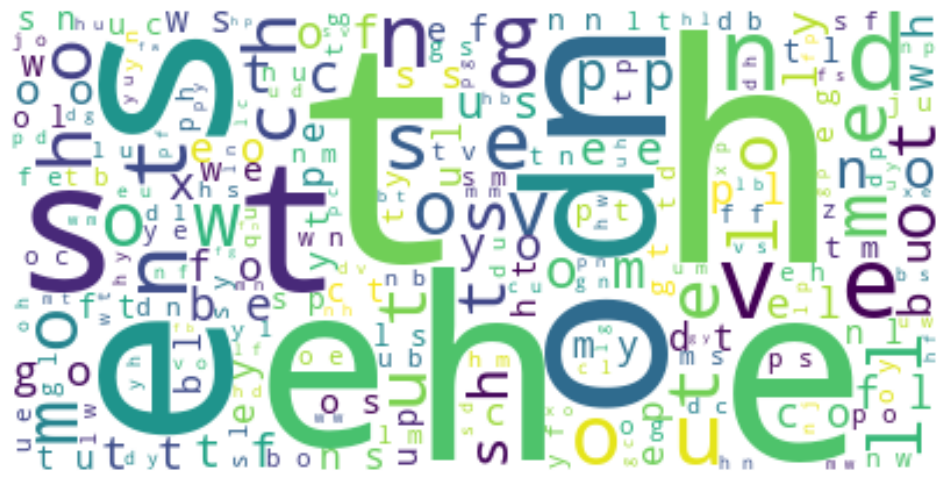

In [ ]:
# Wordcloud of words from positive reviews by appversion
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]
wordcloud = WordCloud (background_color='white').generate_from_text(' '.join(pos_tokens) )
# Display the generated image:
plt. figure(figsize=(12,12))
plt. imshow(wordcloud, interpolation= 'bilinear')
plt. axis ("off")
plt. show()

In [ ]:
#wordclouds at times can be difficult to interprete we can use NLKT to view freaquency
# use the nitk FreqDist and then tabulate
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist. tabulate (10)

          e     t     o     i     a     n     s     h     r 
35669 17807 14579 12462 12138 12017 10210 10136  7157  6686 


In [ ]:
# For negative
from nltk.probability import FreqDist
neg_freqdist = FreqDist (neg_tokens)
neg_freqdist. tabulate (10)

          e     t     i     o     a     n     s     r     h 
19681 10018  8342  6948  6759  6495  6456  5689  4214  3856 


<Axes: xlabel='Samples', ylabel='Counts'>

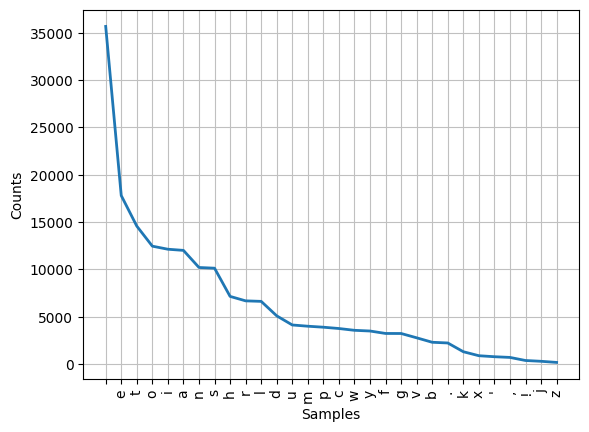

In [ ]:
#we can also use plot to show frequency distribution
pos_freqdist.plot(30)

<Axes: xlabel='Samples', ylabel='Counts'>

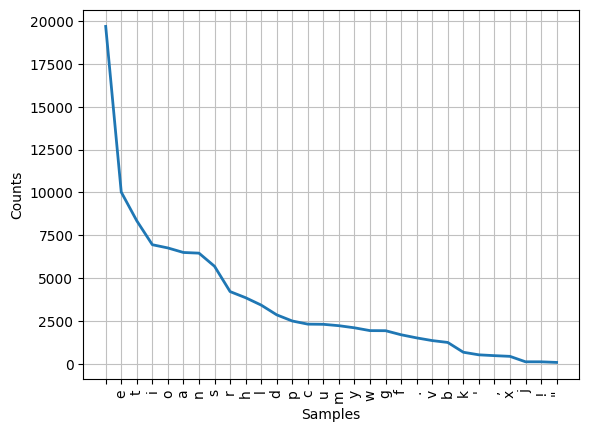

In [ ]:
neg_freqdist.plot(30)

# Part three Objective of the study

#Task 1 - Identifying most preferred app version

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load the dataset
df = pd.read_csv('netflix_reviews.csv')

# Check if 'content' column exists
if 'content' not in df.columns:
    raise KeyError("The 'content' column is not found in the dataset.")

# Convert all values in the 'content' column to strings
df['content'] = df['content'].astype(str)

# Initialize SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Create new columns for sentiment scores
df['compound'] = df['content'].apply(lambda review: sentiment.polarity_scores(review)['compound'])
df['neg'] = df['content'].apply(lambda review: sentiment.polarity_scores(review)['neg'])
df['neu'] = df['content'].apply(lambda review: sentiment.polarity_scores(review)['neu'])
df['pos'] = df['content'].apply(lambda review: sentiment.polarity_scores(review)['pos'])

# Display the updated DataFrame with sentiment columns
print(df[['content', 'compound', 'neg', 'neu', 'pos']].head())

# Analyze the appVersion column
app_version_counts = df['appVersion'].value_counts()

# Group reviews by appVersion to identify the versions with the highest review count
top_app_versions = app_version_counts.head(10)
print("Top 10 App Versions by Review Count:")
print(top_app_versions)

                                             content  compound    neg    neu  \
0                                          Very good    0.4927  0.000  0.238   
1                                 MShahid Ali baloch    0.0000  0.000  1.000   
2  Very limited series...all the famous series ar...   -0.0240  0.096  0.810   
3  Cant stream HD with Asus Zenfone 10 with snapd...   -0.3612  0.143  0.857   
4                                Worst ui experience   -0.6249  0.672  0.328   

     pos  
0  0.762  
1  0.000  
2  0.094  
3  0.000  
4  0.000  
Top 10 App Versions by Review Count:
appVersion
7.84.1 build 28 35243     1911
8.96.1 build 16 50568     1880
7.38.0 build 27 34635     1703
8.104.0 build 5 50619     1249
8.105.0 build 15 50626    1206
8.11.1 build 12 40101     1053
7.83.0 build 25 35223     1009
8.114.0 build 19 50680     974
8.26.0 build 11 40221      972
6.20.1 build 51 31579      933
Name: count, dtype: int64


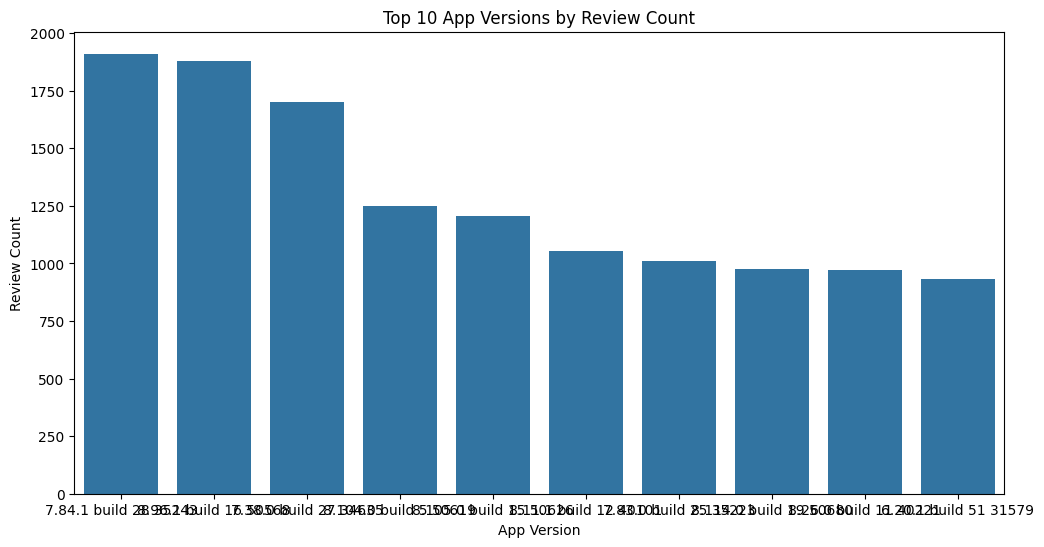

In [ ]:
# Visualize top 10 app versions by review count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_app_versions.index, y=top_app_versions.values)
plt.title('Top 10 App Versions by Review Count')
plt.xlabel('App Version')
plt.ylabel('Review Count')
plt.show()


Sentiment Scores by App Version:
                       compound       neg       neu       pos
appVersion                                                   
1.0                    0.429887  0.067256  0.679576  0.253168
1.6.0 build 443        0.000000  0.000000  1.000000  0.000000
1.8.0 build 561       -0.726900  0.240000  0.712000  0.049000
1.8.1 build 573        0.493900  0.000000  0.881000  0.119000
2.2.0 build 843        0.077200  0.082000  0.824000  0.094000
...                         ...       ...       ...       ...
8.97.0 build 8 50572   0.337037  0.071250  0.714375  0.214250
8.97.1 build 11 50573 -0.231720  0.162000  0.785600  0.052400
8.97.3 build 19 50576  0.084553  0.086154  0.772814  0.141020
8.99.0 build 3 50586   0.202300  0.055000  0.871000  0.075000
8.99.1 build 8 50590   0.071122  0.093917  0.762898  0.140462

[590 rows x 4 columns]


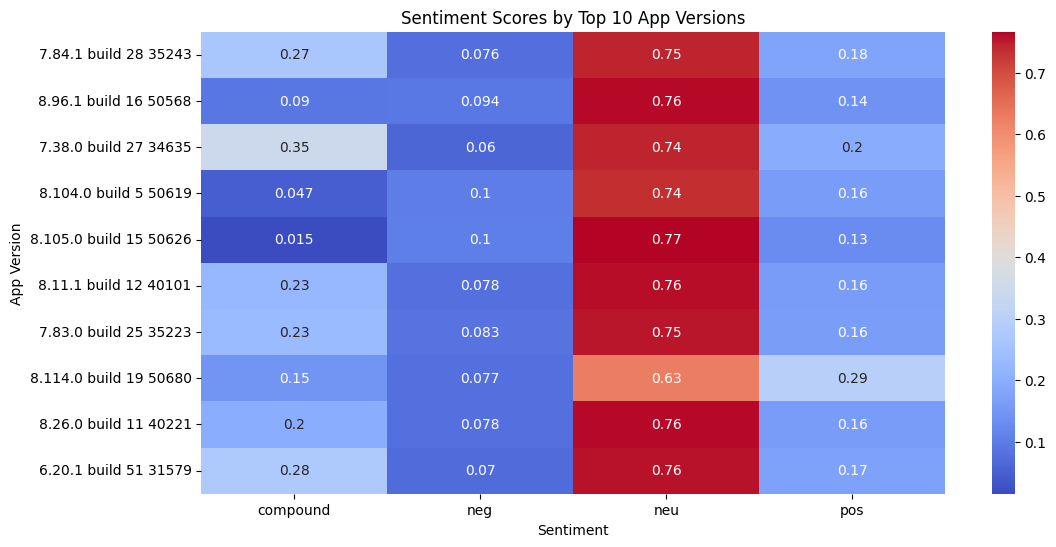

In [ ]:
# Calculate sentiment scores for each app version
sentiment_scores = df.groupby('appVersion')[['compound', 'neg', 'neu', 'pos']].mean()
print("\nSentiment Scores by App Version:")
print(sentiment_scores)
# Visualize sentiment scores for top 10 app versions
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_scores.loc[top_app_versions.index], annot=True, cmap='coolwarm')
plt.title('Sentiment Scores by Top 10 App Versions')
plt.xlabel('Sentiment')
plt.ylabel('App Version')
plt.show()


Engagement Scores by App Version:
appVersion
1.0                        34
1.6.0 build 443             0
1.8.0 build 561             1
1.8.1 build 573             0
2.2.0 build 843             0
                         ... 
8.97.0 build 8 50572        0
8.97.1 build 11 50573      21
8.97.3 build 19 50576    3110
8.99.0 build 3 50586        2
8.99.1 build 8 50590     3269
Name: thumbsUpCount, Length: 590, dtype: int64


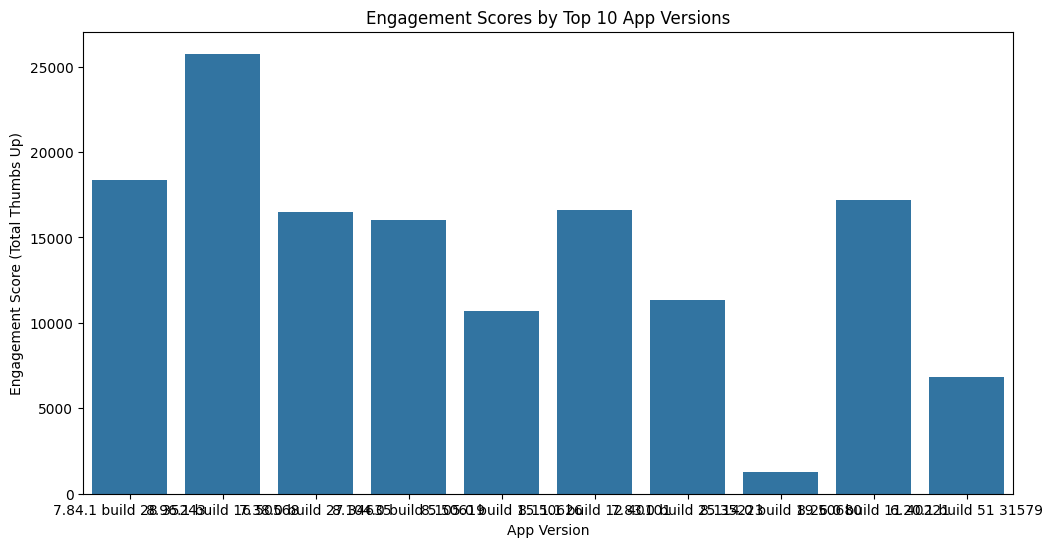

In [ ]:
# Evaluate user engagement
engagement_scores = df.groupby('appVersion')['thumbsUpCount'].sum()
print("\nEngagement Scores by App Version:")
print(engagement_scores)

# Visualize engagement scores for top 10 app versions
plt.figure(figsize=(12, 6))
sns.barplot(x=engagement_scores.loc[top_app_versions.index].index, y=engagement_scores.loc[top_app_versions.index].values)
plt.title('Engagement Scores by Top 10 App Versions')
plt.xlabel('App Version')
plt.ylabel('Engagement Score (Total Thumbs Up)')
plt.show()

In [ ]:
# Combine sentiment scores and engagement data
combined_scores = sentiment_scores.join(engagement_scores, on='appVersion')
combined_scores['Total Reviews'] = df.groupby('appVersion').size()
combined_scores['Positive Ratio'] = df.groupby('appVersion')['pos'].mean()
combined_scores['Engagement Score'] = combined_scores['thumbsUpCount'] / combined_scores['Total Reviews']

# Determine the app version with the highest overall user satisfaction
preferred_app_version = combined_scores.sort_values(by=['Positive Ratio', 'Engagement Score'], ascending=False).head(1)
print("\nMost Preferred App Version:")
print(preferred_app_version)


Most Preferred App Version:
                      compound  neg  neu  pos  thumbsUpCount  Total Reviews  \
appVersion                                                                    
8.28.0 build 4 40234    0.4404  0.0  0.0  1.0              0              1   

                      Positive Ratio  Engagement Score  
appVersion                                              
8.28.0 build 4 40234             1.0               0.0  


Word Cloud for App Version: 7.84.1 build 28 35243


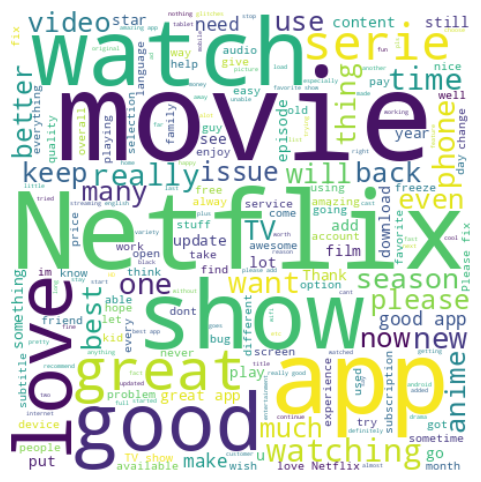

Word Cloud for App Version: 8.96.1 build 16 50568


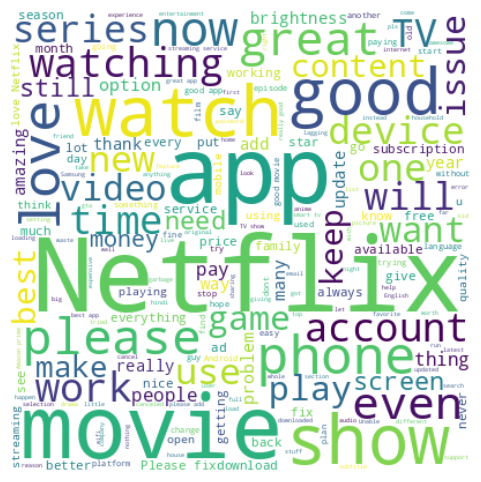

Word Cloud for App Version: 7.38.0 build 27 34635


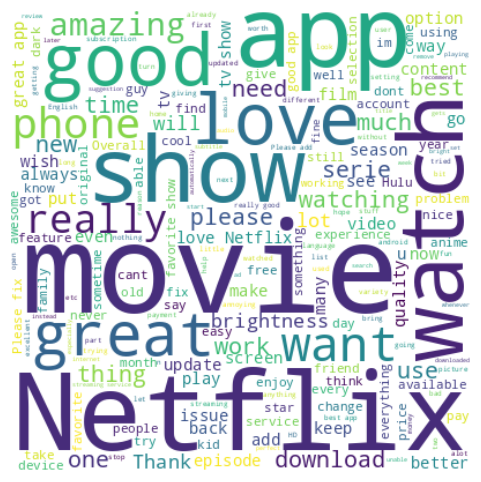

Word Cloud for App Version: 8.104.0 build 5 50619


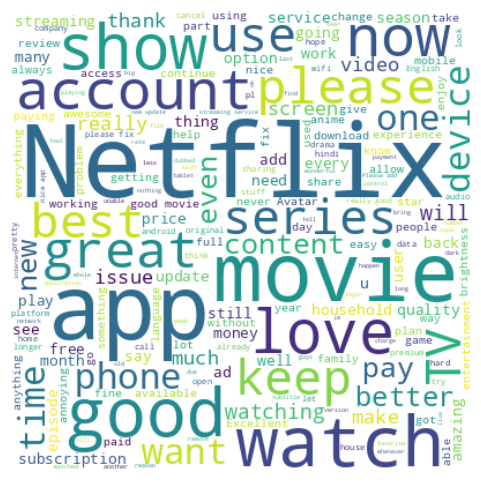

Word Cloud for App Version: 8.105.0 build 15 50626


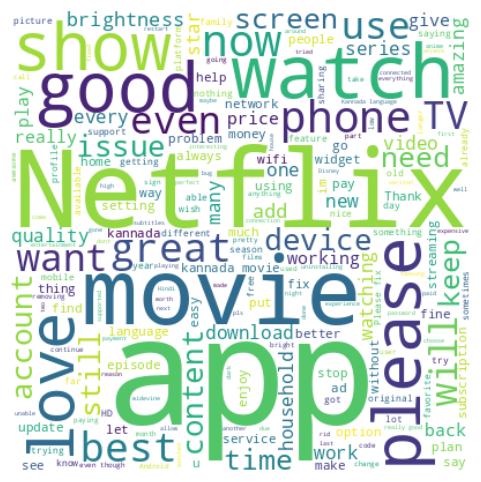

Word Cloud for App Version: 8.11.1 build 12 40101


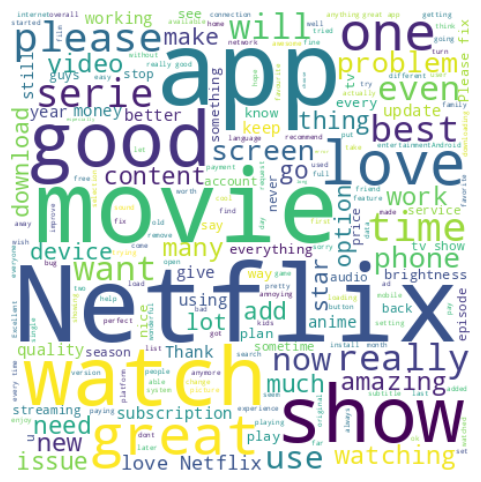

Word Cloud for App Version: 7.83.0 build 25 35223


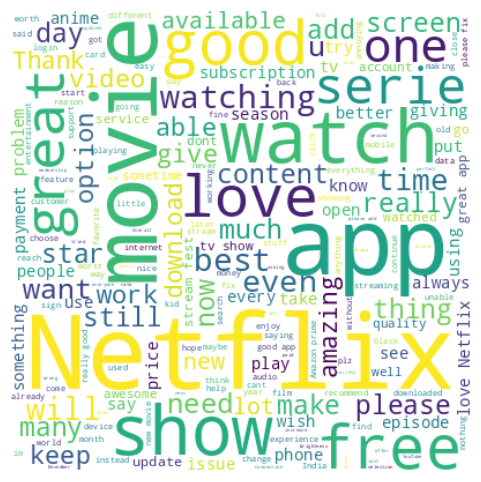

Word Cloud for App Version: 8.114.0 build 19 50680


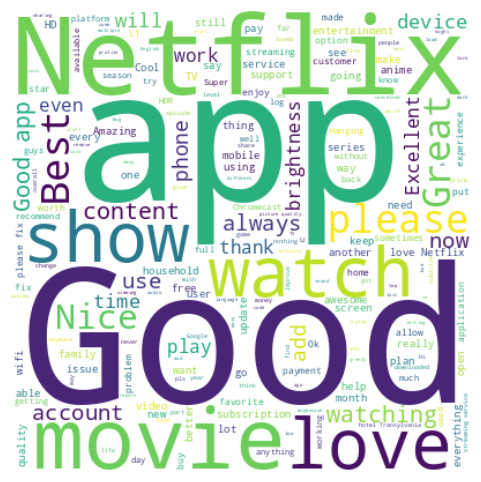

Word Cloud for App Version: 8.26.0 build 11 40221


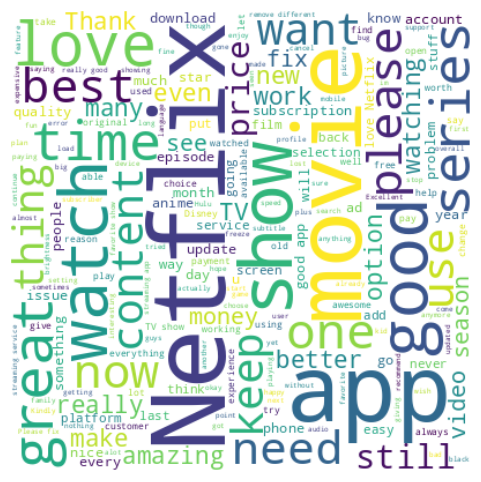

Word Cloud for App Version: 6.20.1 build 51 31579


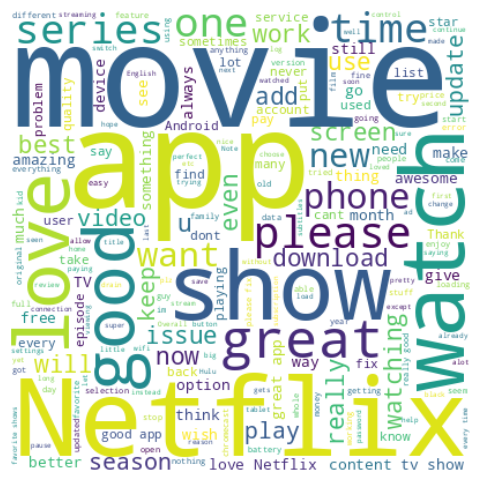

In [ ]:
# Function to generate word cloud with minimized size
def generate_word_cloud(reviews):
    pos_tokens = [word for review in reviews for word in review.split()]
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(' '.join(pos_tokens))

    # Display the generated image
    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Filter positive reviews
positive_reviews = df[df['compound'] > 0.05]

# Generate word cloud for top 10 preferred app versions
for app_version in top_app_versions.index:
    reviews_positive_subset = positive_reviews[positive_reviews['appVersion'] == app_version]['content']
    print(f"Word Cloud for App Version: {app_version}")
    generate_word_cloud(reviews_positive_subset)

In [ ]:
from collections import Counter
# Function to get most used words
def get_most_used_words(reviews, num_words=10):
    pos_tokens = [word for review in reviews for word in review.split()]
    word_counts = Counter(pos_tokens)
    return word_counts.most_common(num_words)

# Print most used words for top 10 preferred app versions
for app_version in top_app_versions.index:
    reviews_positive_subset = positive_reviews[positive_reviews['appVersion'] == app_version]['content']
    most_used_words = get_most_used_words(reviews_positive_subset)
    print(f"Most Used Words for App Version {app_version}:")
    print(most_used_words)

Most Used Words for App Version 7.84.1 build 28 35243:
[('the', 1204), ('and', 1098), ('I', 1036), ('to', 921), ('it', 729), ('a', 593), ('is', 590), ('of', 505), ('app', 430), ('on', 413)]
Most Used Words for App Version 8.96.1 build 16 50568:
[('the', 803), ('I', 729), ('and', 704), ('to', 697), ('is', 448), ('a', 420), ('it', 417), ('my', 373), ('on', 300), ('for', 299)]
Most Used Words for App Version 7.38.0 build 27 34635:
[('the', 1128), ('and', 1053), ('I', 969), ('to', 928), ('is', 646), ('it', 634), ('a', 608), ('of', 459), ('you', 392), ('app', 372)]
Most Used Words for App Version 8.104.0 build 5 50619:
[('the', 409), ('to', 400), ('and', 347), ('I', 301), ('is', 213), ('a', 198), ('it', 191), ('for', 162), ('my', 160), ('on', 156)]
Most Used Words for App Version 8.105.0 build 15 50626:
[('the', 402), ('I', 344), ('to', 321), ('and', 278), ('it', 205), ('is', 191), ('a', 164), ('app', 156), ('my', 155), ('of', 142)]
Most Used Words for App Version 8.11.1 build 12 40101:
[('

# Trend of country most preferred movie types

In [ ]:
#checking for unique countries
df = pd.read_csv('netflix_titles.csv')

# Split the countries in the 'country' column and flatten them into a list
countries = df['country'].str.split(',').explode().str.strip().unique()

# Print unique countries
print("Unique Countries:")
print(countries)


Unique Countries:
['United States' 'South Africa' nan 'India' 'Ghana' 'Burkina Faso'
 'United Kingdom' 'Germany' 'Ethiopia' 'Czech Republic' 'Mexico' 'Turkey'
 'Australia' 'France' 'Finland' 'China' 'Canada' 'Japan' 'Nigeria' 'Spain'
 'Belgium' 'South Korea' 'Singapore' 'Italy' 'Romania' 'Argentina'
 'Venezuela' 'Hong Kong' 'Russia' '' 'Ireland' 'Nepal' 'New Zealand'
 'Brazil' 'Greece' 'Jordan' 'Colombia' 'Switzerland' 'Israel' 'Taiwan'
 'Bulgaria' 'Algeria' 'Poland' 'Saudi Arabia' 'Thailand' 'Indonesia'
 'Egypt' 'Denmark' 'Kuwait' 'Netherlands' 'Malaysia' 'Vietnam' 'Hungary'
 'Sweden' 'Lebanon' 'Syria' 'Philippines' 'Iceland' 'United Arab Emirates'
 'Norway' 'Qatar' 'Mauritius' 'Austria' 'Cameroon' 'Palestine' 'Uruguay'
 'Kenya' 'Chile' 'Luxembourg' 'Cambodia' 'Bangladesh' 'Portugal'
 'Cayman Islands' 'Senegal' 'Serbia' 'Malta' 'Namibia' 'Angola' 'Peru'
 'Mozambique' 'Belarus' 'Zimbabwe' 'Puerto Rico' 'Pakistan' 'Cyprus'
 'Guatemala' 'Iraq' 'Malawi' 'Paraguay' 'Croatia' 'Iran' 'West G

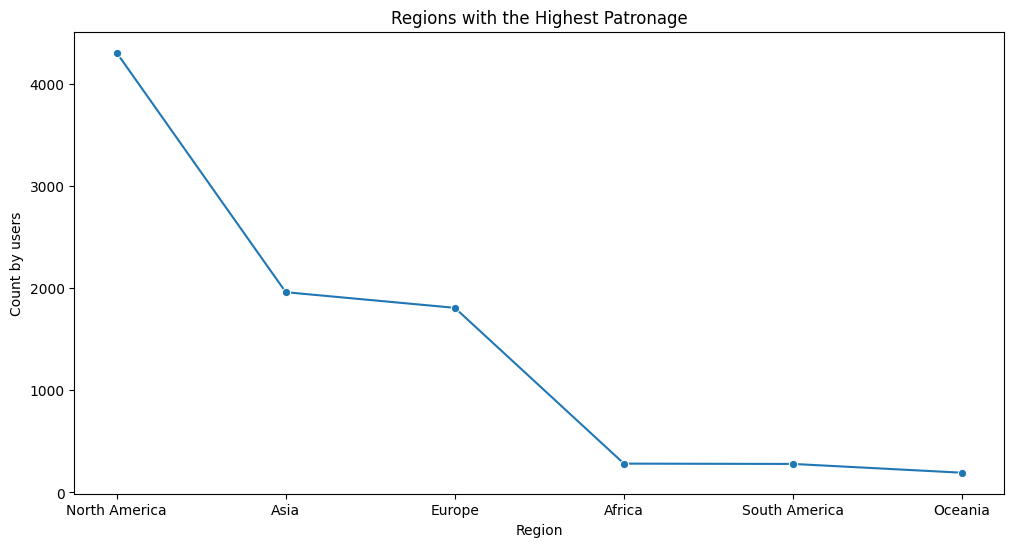

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('netflix_titles.csv')

# Define a dictionary to map countries to regions
country_to_region = {
    'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'Brazil': 'South America', 'Argentina': 'South America', 'Colombia': 'South America', 'Chile': 'South America', 'Peru': 'South America',
    'United Kingdom': 'Europe', 'Germany': 'Europe', 'France': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe', 'Netherlands': 'Europe',
    'Australia': 'Oceania', 'New Zealand': 'Oceania',
    'China': 'Asia', 'Japan': 'Asia', 'India': 'Asia', 'South Korea': 'Asia', 'Indonesia': 'Asia', 'Turkey': 'Asia',
    'Nigeria': 'Africa', 'South Africa': 'Africa', 'Egypt': 'Africa',
    # Add more mappings as needed
}

# Split the countries in the 'country' column and flatten them into a list
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['country'] = df['country'].str.strip()

# Map countries to regions
df['region'] = df['country'].map(country_to_region)

# Drop rows with NaN values in the region column
df = df.dropna(subset=['region'])

# Plot the regions with the highest patronage using a line chart
region_counts = df['region'].value_counts()
plt.figure(figsize=(12, 6))
sns.lineplot(x=region_counts.index, y=region_counts.values, marker='o')
plt.title('Regions with the Highest Patronage')
plt.xlabel('Region')
plt.ylabel('Count by users')
plt.show()

# Identify the best-performing region
best_performing_region = region_counts.idxmax()

# For the top-performing region, identify the country with the most preferred genre and plot a heatmap
top_region_df = df[df['region'] == best_performing_region]
genre_counts = top_region_df.groupby('country')['listed_in'].apply(lambda x: x.str.split(',').explode().value_counts()).unstack().fillna(0)


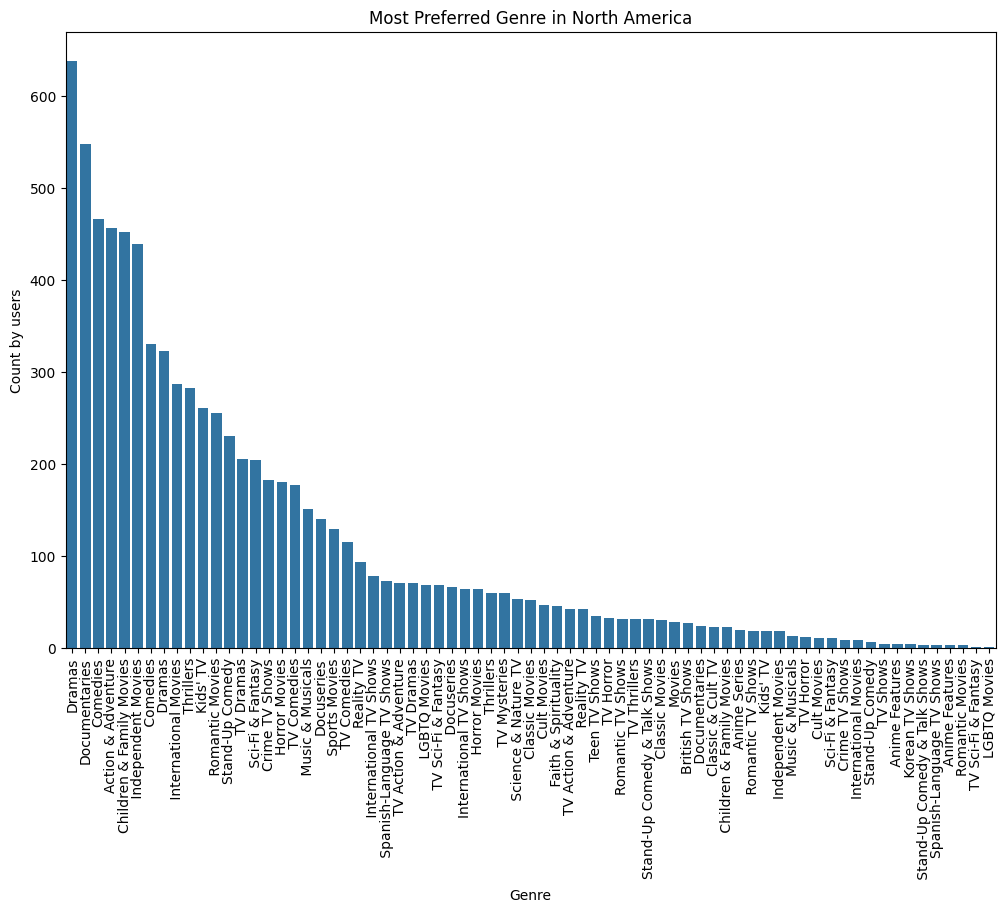

In [ ]:
# Plot the most preferred genre in the best-performing region using a barplot
genre_counts_sum = genre_counts.sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts_sum.index, y=genre_counts_sum.values)
plt.title(f'Most Preferred Genre in {best_performing_region}')
plt.xlabel('Genre')
plt.ylabel('Count by users')
plt.xticks(rotation=90)
plt.show()

# Review sentiment with user engagement

In [ ]:
# Analyze the thumbsUpCount column to measure the popularity of reviews
thumbs_up_counts = App_reviews['thumbsUpCount'].describe()
print("Thumbs Up Count Statistics:")
print(thumbs_up_counts)

Thumbs Up Count Statistics:
count    119320.000000
mean          9.995449
std          98.955184
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8032.000000
Name: thumbsUpCount, dtype: float64


In [ ]:
from scipy.stats import spearmanr

# Calculate Spearman correlation between review sentiment and engagement metrics
sentiment_columns = ['compound', 'neg', 'neu', 'pos']
correlations = {}
for col in sentiment_columns:
    correlation, _ = spearmanr(App_reviews[col], App_reviews['thumbsUpCount'])
    correlations[col] = correlation

print("\nSpearman Correlation between Review Sentiment and Thumbs Up Count:")
print(correlations)


Spearman Correlation between Review Sentiment and Thumbs Up Count:
{'compound': -0.032571472997767394, 'neg': 0.1286010203784826, 'neu': 0.08874085238882257, 'pos': -0.07462158981655322}


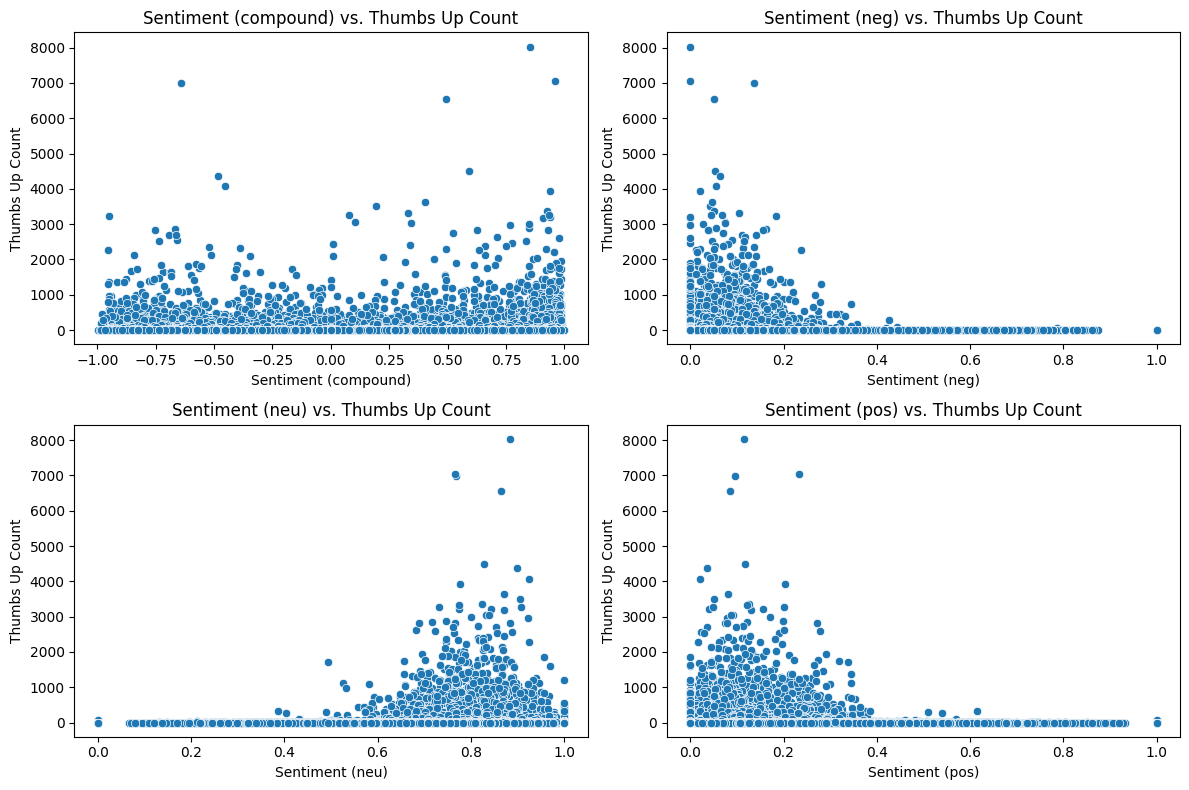

In [ ]:

# Visualization: Plot the correlation using scatter plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(sentiment_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=App_reviews[col], y=App_reviews['thumbsUpCount'])
    plt.title(f'Sentiment ({col}) vs. Thumbs Up Count')
    plt.xlabel(f'Sentiment ({col})')
    plt.ylabel('Thumbs Up Count')

plt.tight_layout()
plt.show()